<a href="https://colab.research.google.com/github/Pegah-Afshar/Complete-Python-3-Bootcamp/blob/master/multi-class%20image%20classification-Dog%20vision.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

* Import TensorFlow
* Import TensorFlow Hub
* Make sure we're using a GPU




In [1]:
#Import TensorFlow
import tensorflow as tf
print('TF version:', tf.__version__)
import tensorflow_hub as hub
print('TF Hub version:', hub.__version__)

#check for GPU availabilitty
print('GPU','available!'if tf.config.list_physical_devices('GPU')else 'Not available')

TF version: 2.4.1
TF Hub version: 0.11.0
GPU available!


Make our data ready (to TensorFlow)

In [2]:
import pandas as pd
lables_csv=pd.read_csv('drive/MyDrive/Dog Vision/dog-breed-identification/labels.csv')
print(lables_csv.describe())
lables_csv.head()

                                      id               breed
count                              10222               10222
unique                             10222                 120
top     7bd0187f1b9e4fbbffc6d4e8e98746e5  scottish_deerhound
freq                                   1                 126


,id,breed
0,000bec180eb18c7604dcecc8fe0dba07,boston_bull
1,001513dfcb2ffafc82cccf4d8bbaba97,dingo
2,001cdf01b096e06d78e9e5112d419397,pekinese
3,00214f311d5d2247d5dfe4fe24b2303d,bluetick
4,0021f9ceb3235effd7fcde7f7538ed62,golden_retriever


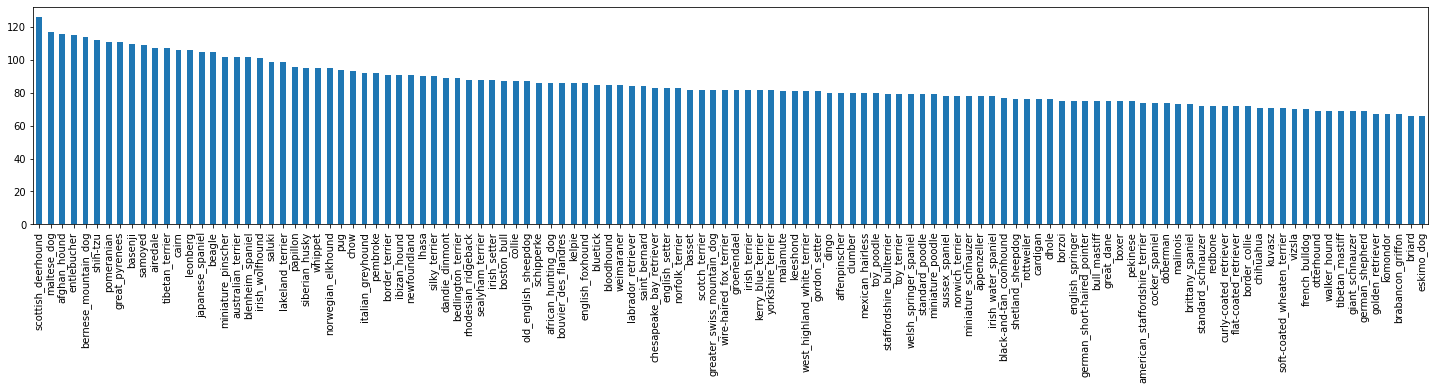

In [3]:
lables_csv['breed'].value_counts().plot.bar(figsize=(25,4))

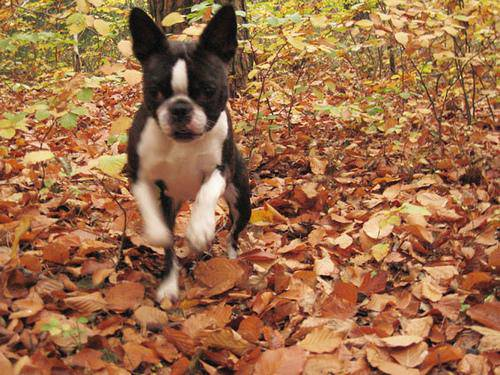

In [4]:
from IPython.display import display, Image
Image("drive/My Drive/Dog Vision/dog-breed-identification/train/000bec180eb18c7604dcecc8fe0dba07.jpg")

In [5]:
# Create pathnames from image ID's
filenames = ["drive/My Drive/Dog Vision/dog-breed-identification/train/" + fname + ".jpg" for fname in lables_csv["id"]]

# Check the first 10 filenames
filenames[:10]

['drive/My Drive/Dog Vision/dog-breed-identification/train/000bec180eb18c7604dcecc8fe0dba07.jpg',
 'drive/My Drive/Dog Vision/dog-breed-identification/train/001513dfcb2ffafc82cccf4d8bbaba97.jpg',
 'drive/My Drive/Dog Vision/dog-breed-identification/train/001cdf01b096e06d78e9e5112d419397.jpg',
 'drive/My Drive/Dog Vision/dog-breed-identification/train/00214f311d5d2247d5dfe4fe24b2303d.jpg',
 'drive/My Drive/Dog Vision/dog-breed-identification/train/0021f9ceb3235effd7fcde7f7538ed62.jpg',
 'drive/My Drive/Dog Vision/dog-breed-identification/train/002211c81b498ef88e1b40b9abf84e1d.jpg',
 'drive/My Drive/Dog Vision/dog-breed-identification/train/00290d3e1fdd27226ba27a8ce248ce85.jpg',
 'drive/My Drive/Dog Vision/dog-breed-identification/train/002a283a315af96eaea0e28e7163b21b.jpg',
 'drive/My Drive/Dog Vision/dog-breed-identification/train/003df8b8a8b05244b1d920bb6cf451f9.jpg',
 'drive/My Drive/Dog Vision/dog-breed-identification/train/0042188c895a2f14ef64a918ed9c7b64.jpg']

In [6]:
# Check whether number of filenames matches number of actual image files
import os
if len(os.listdir("drive/My Drive/Dog Vision/dog-breed-identification/train/")) == len(filenames):
  print("Filenames match actual amount of files!")
else:
  print("Filenames do not match actual amount of files, check the target directory.")

Filenames do not match actual amount of files, check the target directory.


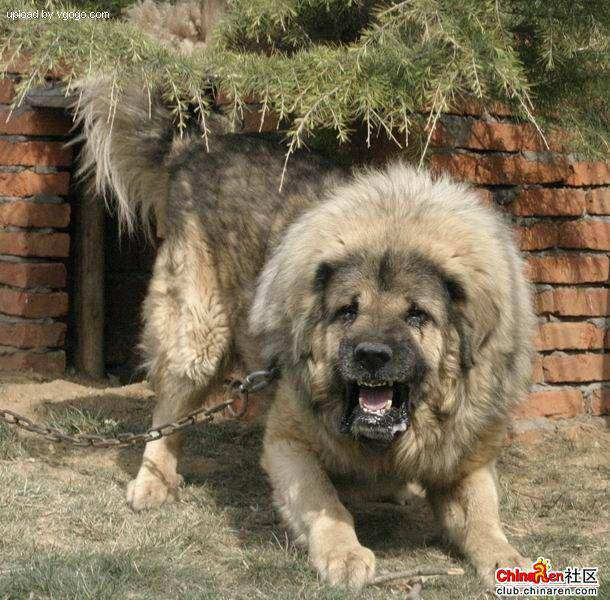

In [7]:
# Check an image directly from a filepath
Image(filenames[9000])

In [8]:
import numpy as np
labels = lables_csv["breed"].to_numpy() # convert labels column to NumPy array
labels[:10]

array(['boston_bull', 'dingo', 'pekinese', 'bluetick', 'golden_retriever',
       'bedlington_terrier', 'bedlington_terrier', 'borzoi', 'basenji',
       'scottish_deerhound'], dtype=object)

In [9]:
# See if number of labels matches the number of filenames
if len(labels) == len(filenames):
  print("Number of labels matches number of filenames!")
else:
  print("Number of labels does not match number of filenames, check data directories.")

Number of labels matches number of filenames!


In [10]:
# Find the unique label values
unique_breeds = np.unique(labels)
len(unique_breeds)

120

In [11]:
# Example: Turn one label into an array of booleans
print(labels[0])
labels[0] == unique_breeds # use comparison operator to create boolean array

boston_bull


array([False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False,  True, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False])

In [12]:
# Turn every label into a boolean array
boolean_labels = [label == np.array(unique_breeds) for label in labels]
boolean_labels[:2]

[array([False, False, False, False, False, False, False, False, False,
        False, False, False, False, False, False, False, False, False,
        False,  True, False, False, False, False, False, False, False,
        False, False, False, False, False, False, False, False, False,
        False, False, False, False, False, False, False, False, False,
        False, False, False, False, False, False, False, False, False,
        False, False, False, False, False, False, False, False, False,
        False, False, False, False, False, False, False, False, False,
        False, False, False, False, False, False, False, False, False,
        False, False, False, False, False, False, False, False, False,
        False, False, False, False, False, False, False, False, False,
        False, False, False, False, False, False, False, False, False,
        False, False, False, False, False, False, False, False, False,
        False, False, False]),
 array([False, False, False, False, False, Fal

In [13]:
# Example: Turning a boolean array into integers
print(labels[0]) # original label
print(np.where(unique_breeds == labels[0])[0][0]) # index where label occurs
print(boolean_labels[0].argmax()) # index where label occurs in boolean array
print(boolean_labels[0].astype(int)) # there will be a 1 where the sample label occurs

boston_bull
19
19
[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0]


In [14]:
X=filenames
y=boolean_labels
len(filenames)

10222

Start experiment with 1000 images and increase as needed

In [15]:
 #set number of images to use for experimenting
 NUM_IMAGES=1000 #@param {type:'slider',min:1000,max:10000,step:1000}

In [16]:
#split data into train test validation sets
from sklearn.model_selection import train_test_split

#split them into trainning and validation of total size NUM_IMAGES
X_train,X_val,y_train,y_val=train_test_split(X[:NUM_IMAGES],y[:NUM_IMAGES],test_size=0.2,random_state=42)
len(X_train),len(X_val),len(y_train),len(y_val)

(800, 200, 800, 200)

###Preprocessing Images (turning images into Tensors)
function to do:
1. take an image filepath as input
2. use TensorFlow to read the file and save it to a variable 'image'
3. turn our 'image' (jpg) to TensorFlow
4. resize 'image' to be shape of (224,224)
5. return the modified 'image'

In [17]:
#convert image to numpy array
from matplotlib.pyplot import imread
image=imread(filenames[42])
image.shape #last is color channel RGB 

(257, 350, 3)

In [18]:
image[:2]

array([[[ 89, 137,  87],
        [ 76, 124,  74],
        [ 63, 111,  59],
        ...,
        [ 76, 134,  86],
        [ 76, 134,  86],
        [ 76, 134,  86]],

       [[ 72, 119,  73],
        [ 67, 114,  68],
        [ 63, 111,  63],
        ...,
        [ 75, 131,  84],
        [ 74, 132,  84],
        [ 74, 131,  86]]], dtype=uint8)

In [19]:
#turn image into Tensor
tf.constant(image)[:2]

<tf.Tensor: shape=(2, 350, 3), dtype=uint8, numpy=
array([[[ 89, 137,  87],
        [ 76, 124,  74],
        [ 63, 111,  59],
        ...,
        [ 76, 134,  86],
        [ 76, 134,  86],
        [ 76, 134,  86]],

       [[ 72, 119,  73],
        [ 67, 114,  68],
        [ 63, 111,  63],
        ...,
        [ 75, 131,  84],
        [ 74, 132,  84],
        [ 74, 131,  86]]], dtype=uint8)>

###Preprocessing Images (turning images into Tensors)

function to do:
1. take an image filepath as input
2. use TensorFlow to read the file and save it to a variable 'image'
3. turn our 'image' (jpg) to TensorFlow
4. Normalize our image(convert color channel values from 0-255 to 0-10
5. resize 'image' to be shape of (224,224)
6. return the modified 'image'

In [42]:
#define image size
IMG_SIZE=224

# creat a function for preprocessing image
def process_image(image_path,img_size=IMG_SIZE):
  'Takes an image file path and turns the image into Tensor'
  #read in an image file
  image=tf.io.read_file(image_path)

  #turn jpg image into numerical Tensor with three colour channel RGB
  image=tf.image.decode_jpeg(image,channels=3)

  #Convert the colour channel values from 0-255 to 0-1
  image = tf.image.convert_image_dtype(image, tf.float32)

# resize the image to our desired value(224,224)
  image=tf.image.resize(image,size=[IMG_SIZE,IMG_SIZE])

  return image

##Turning our data into batches
Why?? For processing 10000+ images, they all might not fit into memory.
So do about 32(batch size) images at a time.(can manually adjust the batch size if need be)
We need our data in the form of Tensor tuples :(image , label)


In [43]:
#creat function to return a tuple(image,lable)
def get_image_label(image_path,label):
  image=process_image(image_path)
  return image,label

In [44]:
(process_image(X[42]),tf.constant(y[42]))

(<tf.Tensor: shape=(224, 224, 3), dtype=float32, numpy=
 array([[[0.3264178 , 0.5222886 , 0.3232816 ],
         [0.2537167 , 0.44366494, 0.24117757],
         [0.25699762, 0.4467087 , 0.23893751],
         ...,
         [0.29325107, 0.5189916 , 0.3215547 ],
         [0.29721776, 0.52466875, 0.33030328],
         [0.2948505 , 0.5223015 , 0.33406618]],
 
        [[0.25903144, 0.4537807 , 0.27294815],
         [0.24375686, 0.4407019 , 0.2554778 ],
         [0.2838985 , 0.47213382, 0.28298813],
         ...,
         [0.2785345 , 0.5027992 , 0.31004712],
         [0.28428748, 0.5108719 , 0.32523635],
         [0.28821915, 0.5148036 , 0.32916805]],
 
        [[0.20941195, 0.40692952, 0.25792548],
         [0.24045378, 0.43900946, 0.2868911 ],
         [0.29001117, 0.47937486, 0.32247734],
         ...,
         [0.26074055, 0.48414773, 0.30125174],
         [0.27101526, 0.49454468, 0.32096273],
         [0.27939945, 0.5029289 , 0.32934693]],
 
        ...,
 
        [[0.00634795, 0.03442048

In [50]:
# Define the batch size, 32 is a good default
BATCH_SIZE = 32 

#creat a function to turn data into batches
def creat_data_batches(X,y=None,batch_size=BATCH_SIZE,valid_data=False,test_data=False):
  "creat batches of data out of image(x) and label(y) pairs.Shuffles the data if its training data but doesnt shuffle if its validation data. Accept test data as input(no lable)"
 
  #if data is test dont have lables
  if test_data:
    print("creating test data batches ..")
    data=tf.data.Dataset.from_tensor_slices((tf.constant(X)))#only filepaths(no lables)
    data_batch=data.map(process_image).batch(BATCH_SIZE)
    return data_batch

  #if data is valid dataset, dont need to shuffle it
  elif valid_data:
    print("creating validation data batches ..")
    data=tf.data.Dataset.from_tensor_slices((tf.constant(X),tf.constant(y))) #filepath , lables
    data_batch=data.map(get_image_label).batch(BATCH_SIZE)
    return data_batch

  else:
    print("creating training data batches ..")
    #turn filepaths and lables into Tensors
    data=tf.data.Dataset.from_tensor_slices((tf.constant(X),tf.constant(y)))
    #shuffling pathnames and lables before mapping image processor function is faster than shuffling images
    data=data.shuffle(buffer_size=len(X))

    #creat (image,label) tuples (this also turns image path into preprocessed image)
    data=data.map(get_image_label)

    #turn training data into batches
    data_batch=data.batch(BATCH_SIZE)
  return data_batch